# Unexplored stuff

## Feature Engineering
- Using ??

In [6]:
from Master import MasterDataframes, ModelTrainer, MLModel

import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [7]:
M_df = MasterDataframes()

# Training A

In [8]:
trials=1
submission="twelfth"

In [9]:
model_a = ModelTrainer().train_model(location="A", trials=trials)

[I 2023-10-02 10:02:56,055] A new study created in memory with name: regression
[I 2023-10-02 10:02:57,428] Trial 0 finished with value: 251.8738031678688 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'hist', 'max_depth': 4, 'learning_rate': 0.8138206262872453, 'n_estimators': 580, 'min_child_weight': 5, 'gamma': 0.4712647096780799, 'subsample': 0.75, 'colsample_bytree': 0.75, 'reg_alpha': 0.6076479508973033, 'reg_lambda': 0.46608278612527143, 'random_state': 535}. Best is trial 0 with value: 251.8738031678688.


R2:  0.8106040412803097
RMSE:  496.7328308744876
graded! MAE:  249.7180466276011
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "hist",
    "max_depth": 4,
    "learning_rate": 0.8138206262872453,
    "n_estimators": 580,
    "min_child_weight": 5,
    "gamma": 0.4712647096780799,
    "subsample": 0.75,
    "colsample_bytree": 0.75,
    "reg_alpha": 0.6076479508973033,
    "reg_lambda": 0.46608278612527143,
    "random_state": 535
}


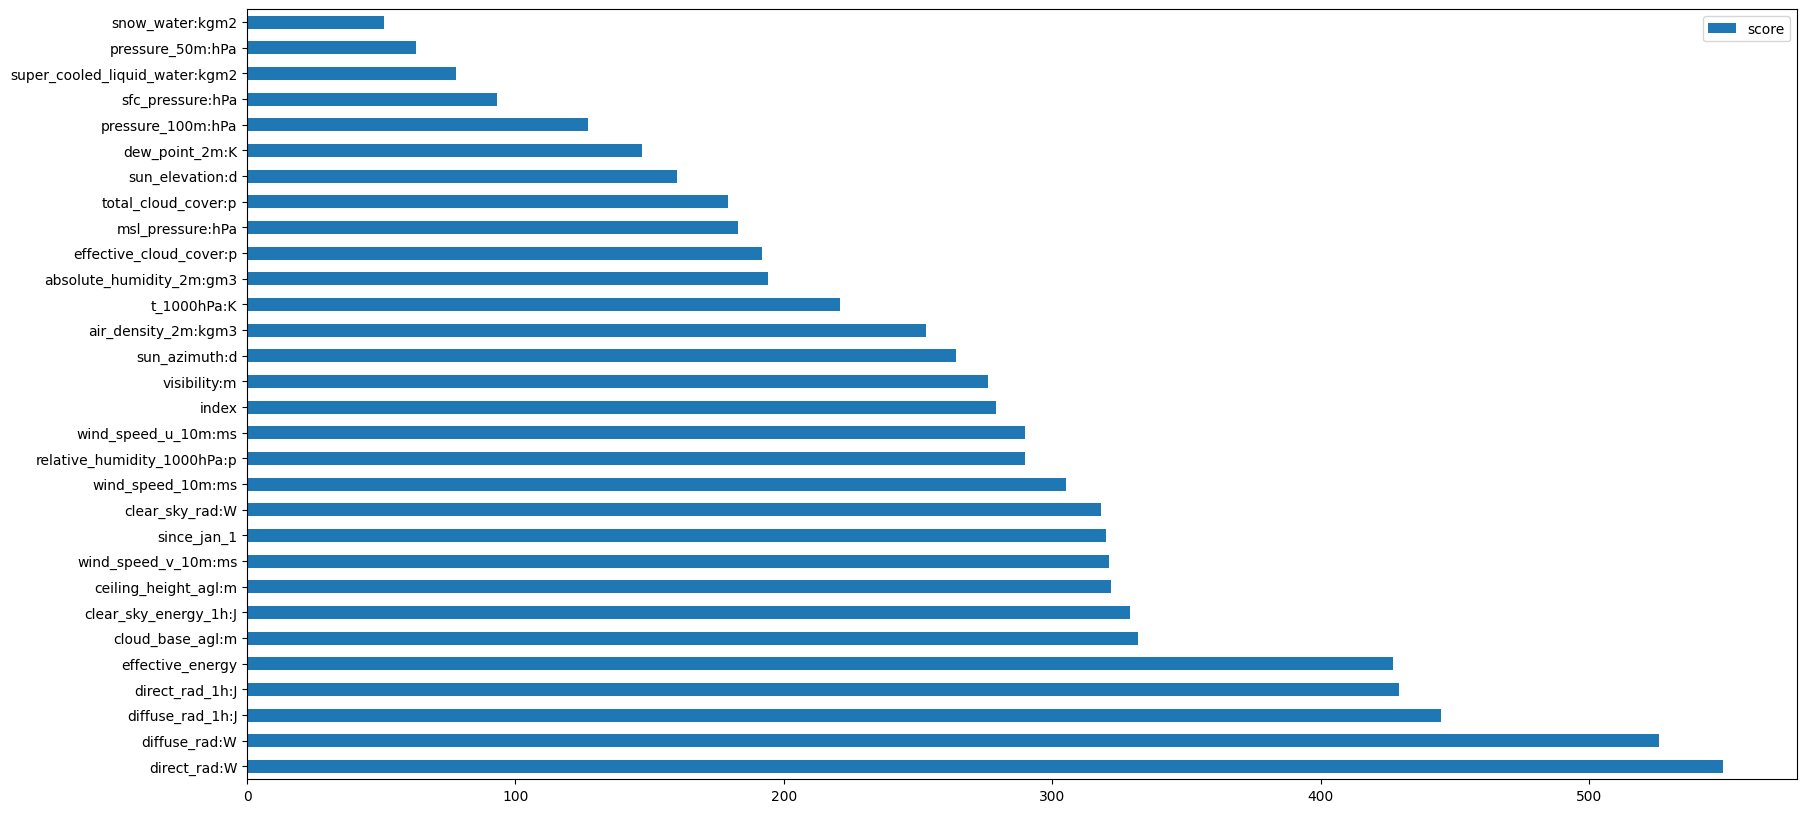

In [10]:
model_a.plot_important_features(top=30)

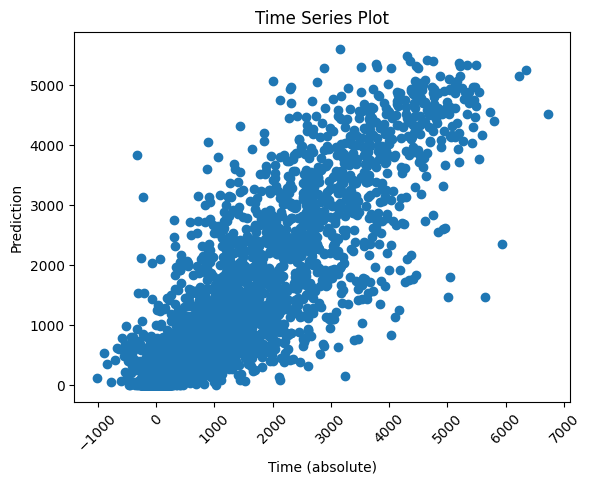

In [11]:
model_a.plot_pred_vs_test()

# Train B

In [12]:
model_b = ModelTrainer().train_model(location="B", trials=trials)

[I 2023-10-02 10:03:01,343] A new study created in memory with name: regression
[I 2023-10-02 10:03:02,076] Trial 0 finished with value: 40.481010947407356 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'hist', 'max_depth': 4, 'learning_rate': 0.9575611448080831, 'n_estimators': 288, 'min_child_weight': 1, 'gamma': 0.43449222286825306, 'subsample': 0.95, 'colsample_bytree': 0.75, 'reg_alpha': 0.02864739525381938, 'reg_lambda': 0.4155511394125115, 'random_state': 992}. Best is trial 0 with value: 40.481010947407356.


R2:  0.8546755333306526
RMSE:  74.06351170680905
graded! MAE:  35.72909755952344
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "hist",
    "max_depth": 4,
    "learning_rate": 0.9575611448080831,
    "n_estimators": 288,
    "min_child_weight": 1,
    "gamma": 0.43449222286825306,
    "subsample": 0.95,
    "colsample_bytree": 0.75,
    "reg_alpha": 0.02864739525381938,
    "reg_lambda": 0.4155511394125115,
    "random_state": 992
}


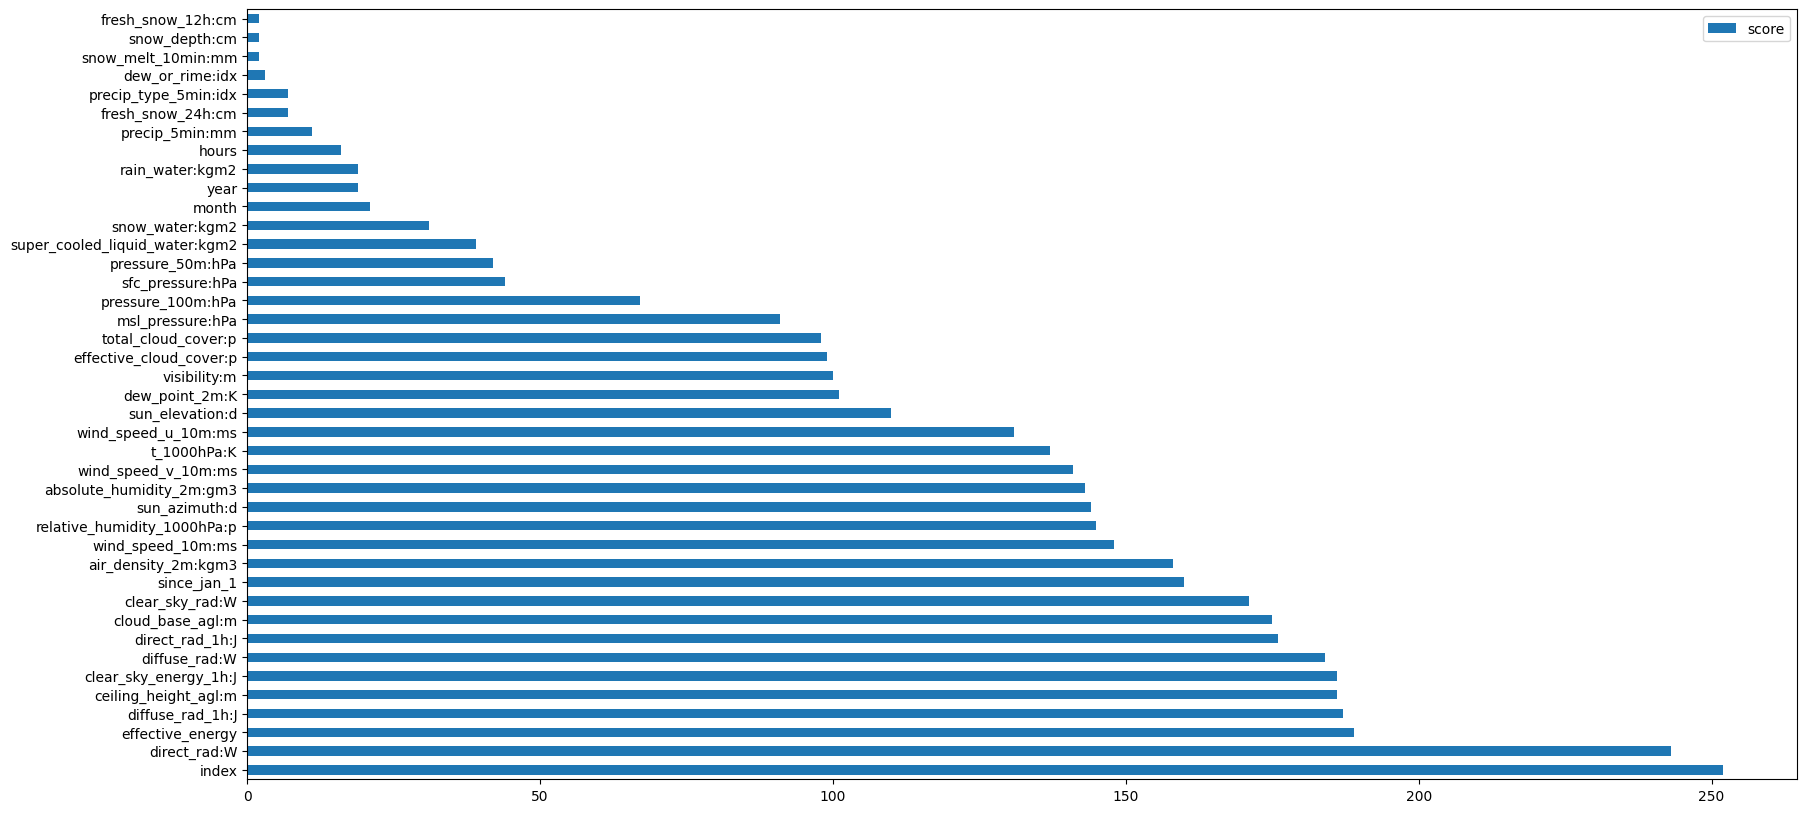

In [13]:
model_b.plot_important_features(50)

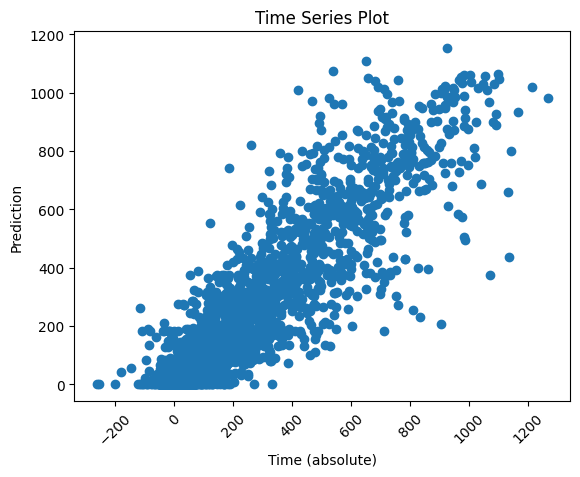

In [14]:
model_b.plot_pred_vs_test()

# Train c

In [15]:
model_c = ModelTrainer().train_model(location="C", trials=trials)

[I 2023-10-02 10:03:04,552] A new study created in memory with name: regression
[I 2023-10-02 10:03:09,912] Trial 0 finished with value: 15.673965570522691 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'approx', 'max_depth': 10, 'learning_rate': 0.20274374726316446, 'n_estimators': 311, 'min_child_weight': 7, 'gamma': 0.6079731763702605, 'subsample': 0.9, 'colsample_bytree': 1.0, 'reg_alpha': 0.7795772047565523, 'reg_lambda': 0.948035373319378, 'random_state': 139}. Best is trial 0 with value: 15.673965570522691.


R2:  0.9102787378871611
RMSE:  45.192712862709314
graded! MAE:  17.313540422307753
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "approx",
    "max_depth": 10,
    "learning_rate": 0.20274374726316446,
    "n_estimators": 311,
    "min_child_weight": 7,
    "gamma": 0.6079731763702605,
    "subsample": 0.9,
    "colsample_bytree": 1.0,
    "reg_alpha": 0.7795772047565523,
    "reg_lambda": 0.948035373319378,
    "random_state": 139
}


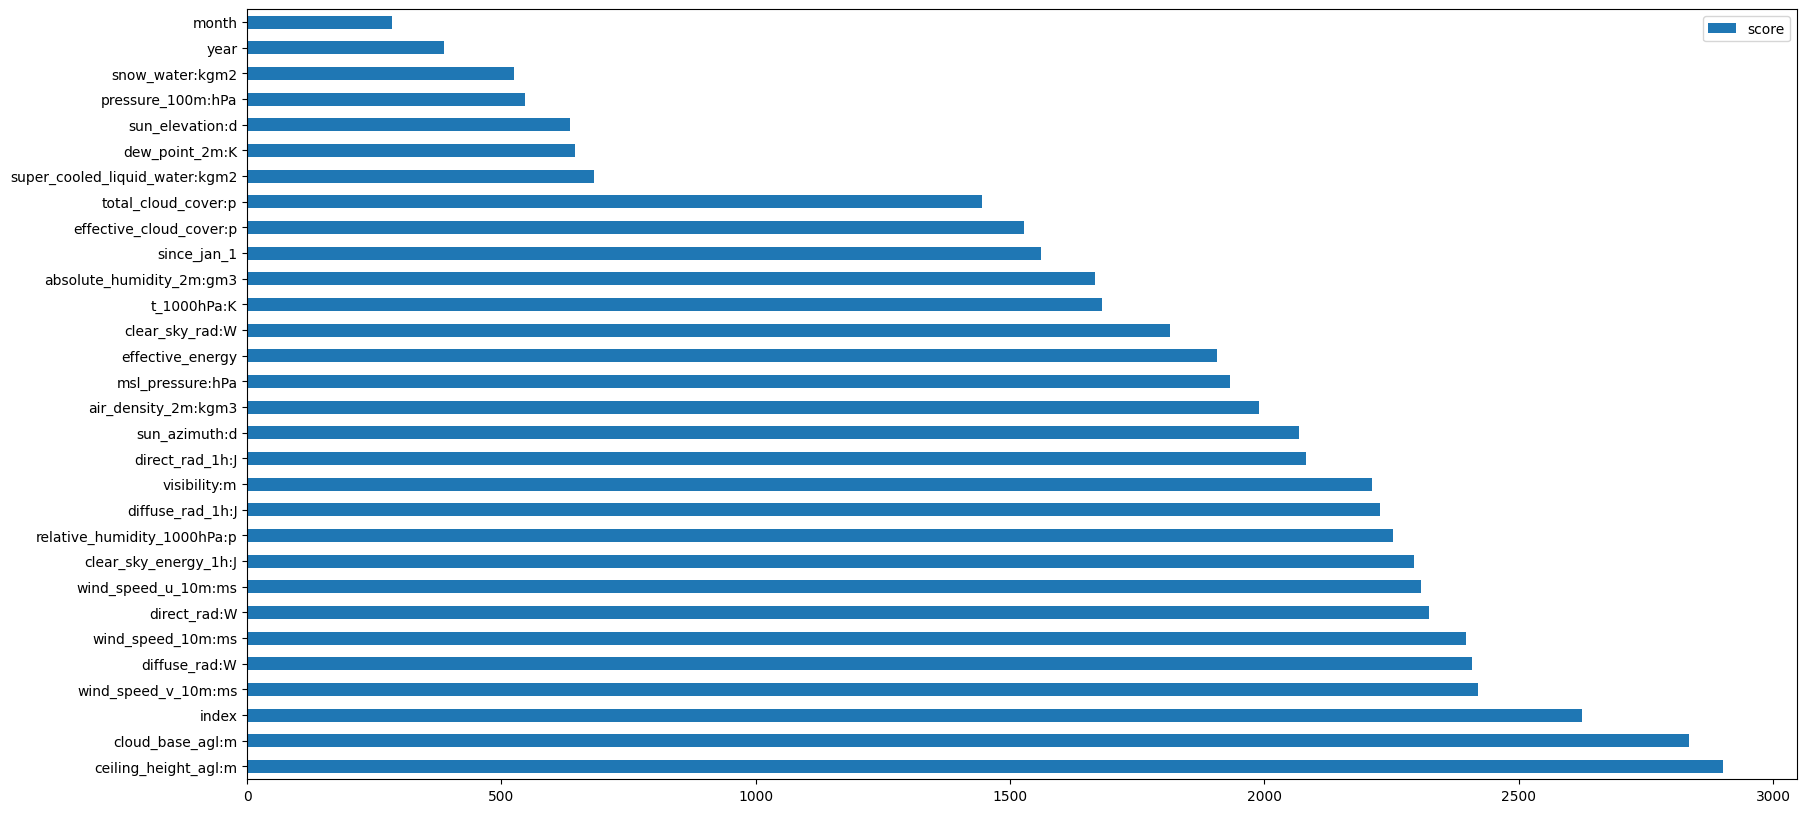

In [16]:
model_c.plot_important_features(30)

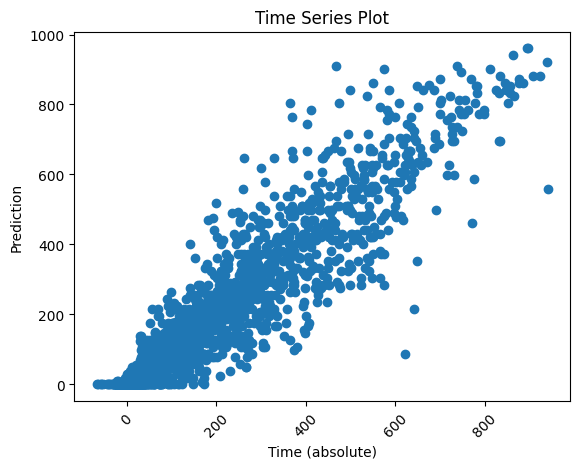

In [17]:
model_c.plot_pred_vs_test()

# Create prediction

In [18]:
y_pred_a = model_a.predict_test_data("A")
print("Length pred: ", len(y_pred_a))
y_pred_b = model_b.predict_test_data("B")
print("Length pred: ", len(y_pred_b))
y_pred_c = model_b.predict_test_data("C")
print("Length pred: ", len(y_pred_c))

predictions = list(y_pred_a) + list(y_pred_b) + list(y_pred_c)

Location A. length: 2880
Length pred:  720
Location B. length: 2880
Length pred:  720
Location C. length: 2880
Length pred:  720


In [19]:
len(predictions)

2160

In [20]:
# df = pd.DataFrame({"prediction":predictions}).rename_axis(index="id")
# df.to_csv(f"submissions/{submission}_submission.csv")

# Predict from pickle_file

In [21]:
# model_a_pickle = pickle.load(open("models/A_xgb_MAE_172_.pkl", "rb"))

In [22]:
# pickle_model = MLModel(model_a_pickle)

In [23]:
# pickle_model.predict_test_data("A")